## Преобразования функций и полиномы. Домашнее задание

С помощью SymPy найдите полиномы, описывающие данные наборы точек. Затем проведите полное исследование каждого полученного полинома: проверьте четность/нечетность, найдите нули, промежутки знакопостоянства. Постройте их графики. С помощью изменения промежутка для х добейтесь того, чтобы все нули были отображены на графике функции.<br><br>
Средний уровень <br><br>
$(-2, 2), (-1, 1), (0, 0), (1, 1), (2, 2)$<br><br>
Сложный уровень <br><br>
$(-3, 33), (-2, 31), (-1, 18), (1, -18), (2, -31), (3, -33)$


In [3]:
from sympy import *
from sympy.plotting import plot
from sympy.solvers.inequalities import solve_univariate_inequality

In [19]:
def polynomial(vals):
    n = len(vals)
    an = symbols('a0:%d'%n)[::-1]
    x,y = symbols('x,y')
    
    fs = list()
    for val in vals:
        f = -y
        for i,a in enumerate(an):
            f += a*x**(n-i-1)
        f = f.subs([(x, val[0]), (y,val[1])])
        fs.append(f)
    polynom = nonlinsolve(fs, an)
    
    f = polynom.args[0][-1]
    
    for i,a in enumerate(polynom.args[0][:-1]):
        f += a*x**(n-i-1)
        
    zero_of_f = solve(f)
        
    print('Полином: ' + str(f))
    print("Функция чётная: " + str(f==f.subs(x,-x)))
    print("Функция нечётная: " + str(f==-f.subs(x,-x)))
    print("Нули функции: " + str(zero_of_f))
    print('Функция больше 0: ' + str(solve_univariate_inequality(f>0, x)))
    print('Функция меньше 0: ' + str(solve_univariate_inequality(f<0, x)))
    
    plot(f, (x, zero_of_f[0]-10, zero_of_f[-1]+10))
    
    return f

Полином: x
Функция чётная: False
Функция нечётная: True
Нули функции: [0]
Функция больше 0: (0 < x) & (x < oo)
Функция меньше 0: (-oo < x) & (x < 0)


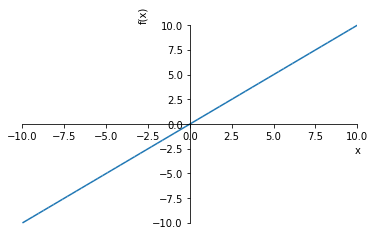

In [115]:
vals = [(-2,2),(-1,1),(0,0),(1,1),(2,2)]
v = polynomial(vals)

Полином: x**5/120 + 19*x**3/24 - 94*x/5
Функция чётная: False
Функция нечётная: True
Нули функции: [0, -I*sqrt(95/2 + sqrt(18049)/2), I*sqrt(95/2 + sqrt(18049)/2), -sqrt(-95/2 + sqrt(18049)/2), sqrt(-95/2 + sqrt(18049)/2)]
Функция больше 0: ((x < oo) & (sqrt(-95/2 + sqrt(18049)/2) < x)) | ((x < 0) & (-sqrt(-95/2 + sqrt(18049)/2) < x))
Функция меньше 0: ((0 < x) & (x < sqrt(-95/2 + sqrt(18049)/2))) | ((-oo < x) & (x < -sqrt(-95/2 + sqrt(18049)/2)))


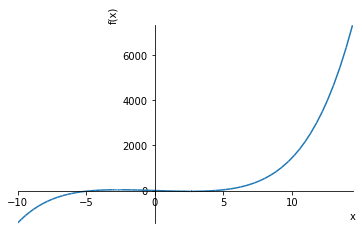

In [20]:
vals = [(-3,33),(-2,31),(-1,18),(1,-18),(2,-31),(3,-33)]
v = polynomial(vals)